In [247]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [248]:
#cargamos los datos de entrada
processDf  = pd.read_csv("Hoja1.csv")
#veamos cuantas dimensiones y registros contiene
processDf = processDf.fillna(0)
processDf.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ECU,South America,Ecuador,2020-03-01,6,6,0.0,0.0,0.0,0.0,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
1,ECU,South America,Ecuador,2020-03-02,6,0,0.0,0.0,0.0,0.0,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
2,ECU,South America,Ecuador,2020-03-03,7,1,0.0,0.0,0.0,0.0,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
3,ECU,South America,Ecuador,2020-03-04,10,3,0.0,0.0,0.0,0.0,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
4,ECU,South America,Ecuador,2020-03-05,13,3,0.0,0.0,0.0,0.0,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759


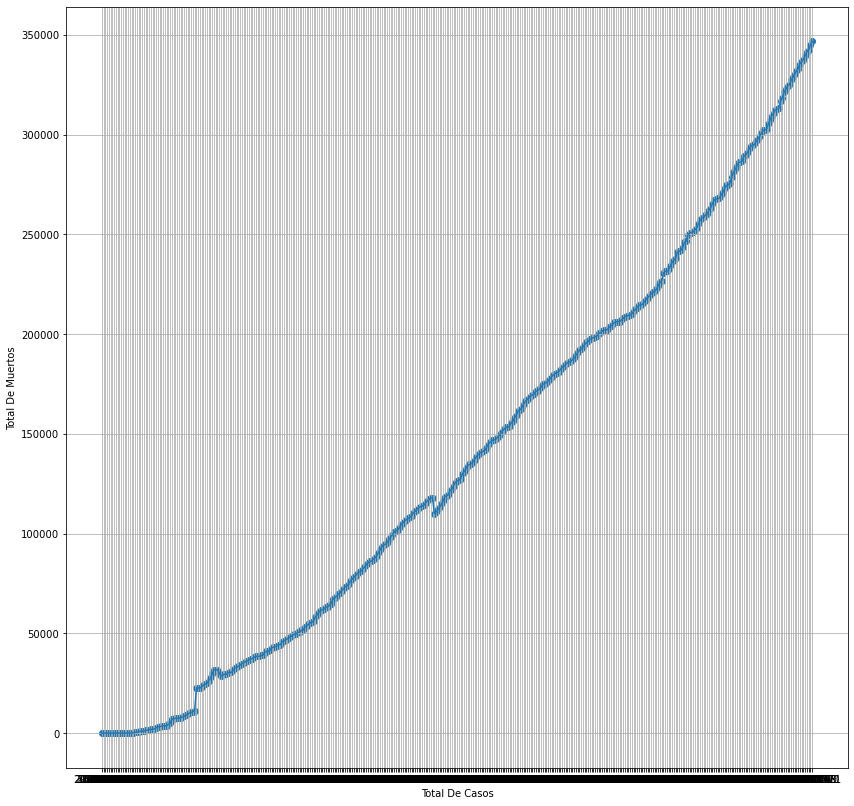

In [249]:
fig = plt.figure(figsize=(14,14))
plt.scatter(processDf['date'],processDf['total_cases'])
plt.plot(processDf['date'],processDf['total_cases'])
plt.xlabel('Total De Casos')
plt.ylabel('Total De Muertos')
plt.grid()

In [250]:
processDf.keys()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [251]:
#Convertimos a la fecha en un numero para el procesamiento de regresion lineal
import datetime as dt
processDf['date'] = pd.to_datetime(processDf['date'])   
processDf['date'] = (processDf['date'] - processDf['date'].min())  / np.timedelta64(1,'D')
print(processDf['date'])

0        0.0
1        1.0
2        2.0
3        3.0
4        4.0
       ...  
402    402.0
403    403.0
404    404.0
405    405.0
406    406.0
Name: date, Length: 407, dtype: float64


In [252]:
totaldate = processDf['date'].values.reshape(-1,1)
totalcases = processDf['total_cases'].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(totaldate, totalcases)
death_predicted = linear_regressor.predict(totaldate)
death_predicted

array([[-3.44995614e+04],
       [-3.36512679e+04],
       [-3.28029745e+04],
       [-3.19546811e+04],
       [-3.11063876e+04],
       [-3.02580942e+04],
       [-2.94098008e+04],
       [-2.85615073e+04],
       [-2.77132139e+04],
       [-2.68649205e+04],
       [-2.60166271e+04],
       [-2.51683336e+04],
       [-2.43200402e+04],
       [-2.34717468e+04],
       [-2.26234533e+04],
       [-2.17751599e+04],
       [-2.09268665e+04],
       [-2.00785730e+04],
       [-1.92302796e+04],
       [-1.83819862e+04],
       [-1.75336928e+04],
       [-1.66853993e+04],
       [-1.58371059e+04],
       [-1.49888125e+04],
       [-1.41405190e+04],
       [-1.32922256e+04],
       [-1.24439322e+04],
       [-1.15956387e+04],
       [-1.07473453e+04],
       [-9.89905189e+03],
       [-9.05075846e+03],
       [-8.20246503e+03],
       [-7.35417160e+03],
       [-6.50587817e+03],
       [-5.65758474e+03],
       [-4.80929131e+03],
       [-3.96099788e+03],
       [-3.11270445e+03],
       [-2.2

In [253]:
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
##Prediccion al paso de 700 dias desde la fecha inicial del Dataset 2020-03-01
dias=700
prediccion = m*dias-c
print("Casos al paso de ",dias,"se obtiene una prediccion de : ",prediccion)

Casos al paso de  700 se obtiene una prediccion de :  628304.9622728019


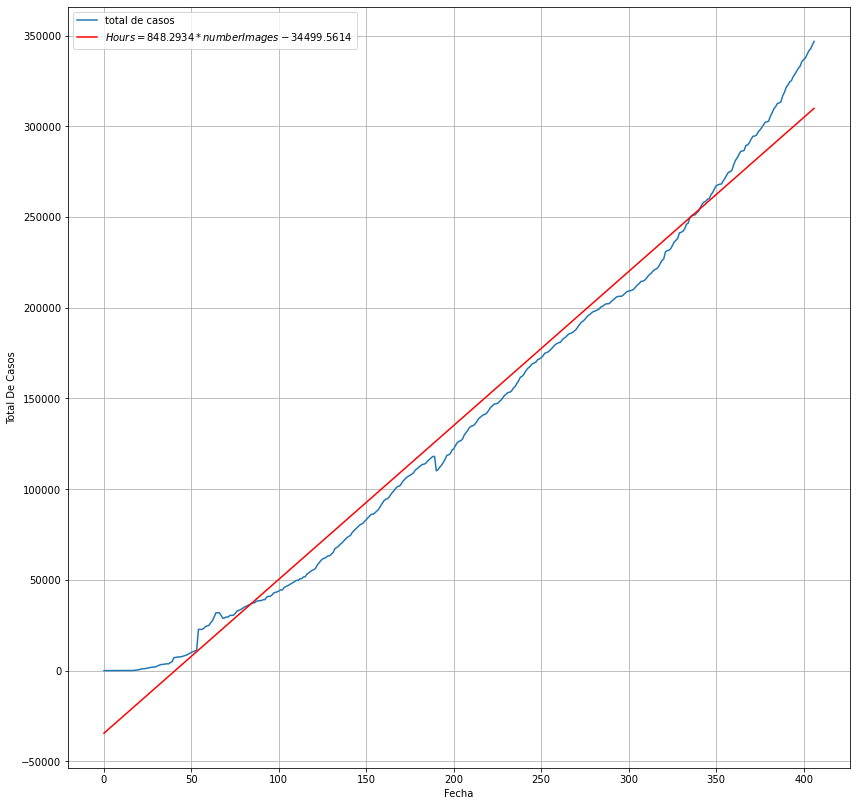

In [254]:
fig = plt.figure(figsize=(14,14))
#plt.scatter(processDf['Image Number'],processDf['Time Lapse (hr)'])
plt.plot(processDf['date'],processDf['total_cases'], label='total de casos')
plt.plot(totaldate, death_predicted, color='red', label=label)
plt.xlabel('Fecha')
plt.ylabel('Total De Casos')
plt.legend()
plt.grid()

In [255]:
print('DATOS DEL MODELO REGRESIÓN LINEAL')
print()
print('Valor de la pendiente o coeficiente "a":')
print(linear_regressor.coef_)
print('Valor de la intersección o coeficiente "b":')
print(linear_regressor.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL

Valor de la pendiente o coeficiente "a":
[[848.29342989]]
Valor de la intersección o coeficiente "b":
[-34499.5613528]


In [ ]:
#Realizamos una Regresion Polinomial 

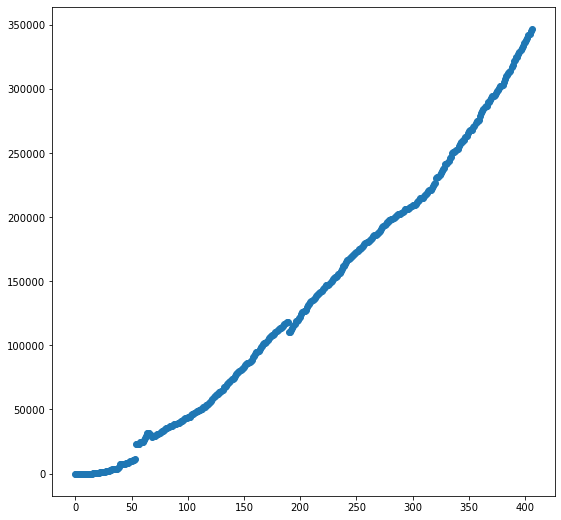

In [257]:
########## PREPARAR LA DATA REGRESIÓN POLINOMIAL ##########
#Seleccionamos solamente la columna 6 del dataset
X_p = processDf['date'].values
#print(X_p)
#Defino los datos correspondientes a las etiquetas
y_p = processDf['total_cases'].values
#print(y_p)
X_p = X_p.reshape(-1,1)
#Graficamos los datos correspondientes
plt.figure(figsize=(9,9))
plt.scatter(X_p, y_p)
plt.show()
########## IMPLEMENTACIÓN DE REGRESIÓN POLINOMIAL ##########
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.5)

In [258]:
from sklearn.preprocessing import PolynomialFeatures
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)
#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)
#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()
#Entreno el modelo
pr.fit(X_train_poli, y_train_p)
#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

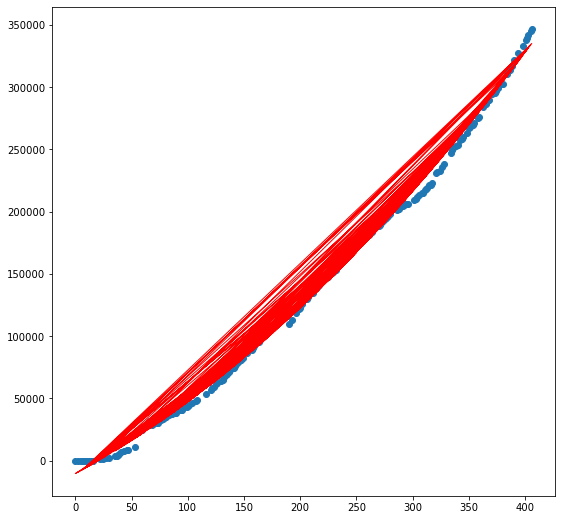

DATOS DEL MODELO REGRESIÓN POLINOMIAL

Valor de la pendiente o coeficiente "a":
[  0.         484.693407     0.90233661]
Valor de la intersección o coeficiente "b":
-10431.960915377946
Precisión del modelo:
0.9978535152260438


In [259]:
#Graficamos los datos junto con el modelo
plt.figure(figsize=(9,9))
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, Y_pred_pr, color='red', linewidth=1)
plt.show()
print('DATOS DEL MODELO REGRESIÓN POLINOMIAL')
print()
print('Valor de la pendiente o coeficiente "a":')
print(pr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(pr.intercept_)
print('Precisión del modelo:')
print(pr.score(X_train_poli, y_train_p))